# Using Keras with backend TensorFlow

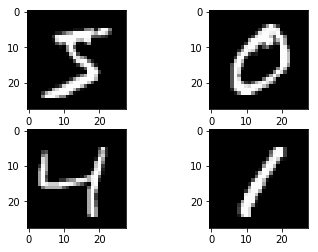

In [1]:
%matplotlib inline
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale (มี 1 channel มีค่าแต่ละ pixel 0-255)
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot

In [2]:
# import class function
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

epochs = 20 
batch_size = 128 


In [3]:
# fix random seed for reproducibility
#seed = 7
#np.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector (pixels) for each image
# X_train.shape[1] = image_width, X_train.shape[2] = image_height
num_pixels = X_train.shape[1] * X_train.shape[2]
#print(X_train.shape[1],'*', X_train.shape[2], '=',num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

num_classes = y_test.shape[1]  # จำนวนตัวเลข 10 classes
print('A number of classes:', num_classes)

X_train shape: (60000, 784)
60000 train samples
10000 test samples
A number of classes: 10


In [4]:
# define model
def mlp_model1():
    # create model
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_pixels,)))
#    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
#    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    # print model
    model.summary()
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
    return model

def mlp_model2():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # print model
    model.summary()
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
model = mlp_model1()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss: %.2f%%' % (100-scores[0]*100))
print('Test accuracy: %.2f%%' % (100-scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2190 - acc: 0.9312 - val_loss: 0.0915 - val_acc: 0.9701
Epoch 2/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0799 - acc: 0.9759 - val_loss: 0.0996 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 2s 25us/step - los